In [36]:
import networkx as nx
import random
import numpy as np

In [37]:
# capacity_map = {
#     ""
# }

G = nx.fast_gnp_random_graph(3,3,2)
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(0,10)
A = nx.adjacency_matrix(G).toarray()
ford_fulkerson(A)

[[0 7 6]
 [7 0 3]
 [6 3 0]]


In [38]:
G2 = [[0, 7], [7, 0]]

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

def drawGraph(G):
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 20]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 20]
    
    pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility
    
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=400)
    
    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
    nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
    )
    
    # node labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)
    
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

def drawGraph2Basic(G):
    pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw_networkx(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [62]:
def printMatrix(G):
    A = nx.adjacency_matrix(G)
    print(A.toarray())
    print(type(G.nodes()))

In [391]:
def find_path(G, nodes, node_val, node_index):
    global sink_found, min_cap, path
    
    if nodes[node_index] == 't':
        sink_found = True
        
    if sink_found == True:
        return
        
    if node_index == (len(nodes) - 1):
        min_cap = float('inf')
        return

    if node_val > 0:
        min_cap = min(min_cap, node_val)
        
    for i in range(len(nodes)):
        if G[node_index][i] > 0 and not(sink_found):
            find_path(G, nodes, G[node_index][i], i)
            path.append([node_index, i])
            G[node_index][i] = -1 # VISITED

In [449]:
def ford_fulkerson(G):
    global sink_found, min_cap, path
    RG = G.copy()
    A = nx.adjacency_matrix(RG)
    A = A.toarray()
    AR = A.copy()

    print(AR)
    print()

    while not(sink_found):
        find_path(AR.copy(), list(RG.nodes()), AR[0][0], 0)
        
        for node in path:
            AR[node[0]][node[1]] -= min_cap
            AR[node[1]][node[0]] = min_cap
            
            #Invert edge
            if AR[node[0]][node[1]] == 0:
                AR[node[1]][node[0]] = min_cap
                
        print(AR)
        if sink_found:
            sink_found = False
            min_cap = float('inf')
            path = []

In [450]:
sink_found = False
min_cap = float('inf')
path = []
ford_fulkerson(G)

[[ 0 20 10  0]
 [ 0  0 30 10]
 [ 0  0  0 20]
 [ 0  0  0  0]]

[[ 0  0 10  0]
 [20  0 10 10]
 [ 0 20  0  0]
 [ 0  0 20  0]]


RecursionError: maximum recursion depth exceeded

In [ ]:
# G2 = np.array([[0,0,20,10],[0,0,0,0],[0,10,0,30],[0,20,0,0]])
G = nx.DiGraph()

G.add_edge("s", "1", weight=20)
G.add_edge("s", "2", weight=10)
G.add_edge("1", "t", weight=10)
G.add_edge("1", "2", weight=30)
G.add_edge("2", "t", weight=20)

RG = G.copy()

# drawGraph(G)
drawGraph2Basic(G)
printMatrix(RG)

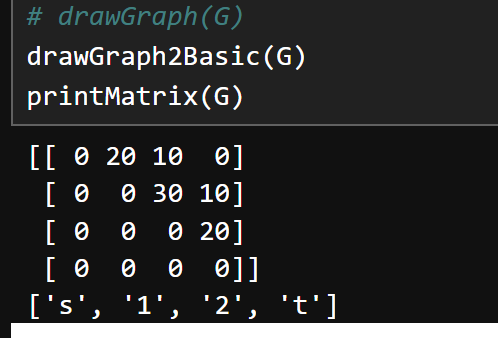